Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/ML_PRJ/anomaly_data.csv')

In [4]:
# first 5 rows of the dataset
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
286638,286638,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,1
286639,286639,-0.608027,0.306694,1.473004,1.191127,0.021265,0.888442,1.190491,0.042147,-0.446426,...,0.046506,0.165163,0.063974,-0.333792,0.131776,-0.217692,-0.082183,-0.116730,168.56,1
286640,286640,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.76,1
286641,286641,-2.220642,1.029181,-0.697724,-1.268226,2.802221,3.322901,0.197036,-0.521297,0.859596,...,0.110448,-1.178463,0.508911,0.923385,0.213759,0.033507,-0.142025,-0.263844,9.47,1
286642,286642,-0.426072,-0.060304,2.220828,0.024742,-0.584964,0.460623,-0.322526,0.434776,1.252404,...,0.149485,0.769878,-0.092634,0.150536,-0.234230,0.504710,0.069158,0.041024,21.80,1


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286643 entries, 0 to 286642
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      286643 non-null  int64  
 1   V1      286643 non-null  float64
 2   V2      286643 non-null  float64
 3   V3      286643 non-null  float64
 4   V4      286643 non-null  float64
 5   V5      286643 non-null  float64
 6   V6      286643 non-null  float64
 7   V7      286643 non-null  float64
 8   V8      286643 non-null  float64
 9   V9      286643 non-null  float64
 10  V10     286643 non-null  float64
 11  V11     286643 non-null  float64
 12  V12     286643 non-null  float64
 13  V13     286643 non-null  float64
 14  V14     286643 non-null  float64
 15  V15     286643 non-null  float64
 16  V16     286643 non-null  float64
 17  V17     286643 non-null  float64
 18  V18     286643 non-null  float64
 19  V19     286643 non-null  float64
 20  V20     286643 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,286048
1,595


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

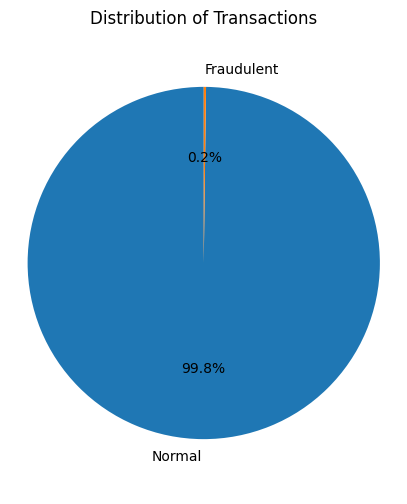

In [9]:
import matplotlib.pyplot as plt

class_counts = credit_card_data['Class'].value_counts()

plt.figure(figsize=(5, 6))
plt.pie(class_counts, labels=['Normal', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transactions')
plt.axis('equal')
plt.show()

In [10]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(286048, 31)
(595, 31)


In [12]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,286048.000000
mean,161.130440
std,1104.508005
min,0.000000
25%,5.837500
50%,22.480000
75%,79.000000
max,25691.160000


In [13]:
fraud.Amount.describe()

,Amount
count,595.000000
mean,152.037479
std,658.044435
min,0.000000
25%,1.000000
50%,13.180000
75%,99.990000
max,10554.680000


In [14]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,143311.223686,0.009952,-0.008616,0.018816,-0.011368,0.007283,0.005603,0.012652,-0.001938,0.007670,...,-0.001335,-0.001873,-0.000786,-0.000249,0.000932,0.000664,-0.000148,-0.00151,-0.001008,161.130440
1,148020.991597,-3.972475,3.020911,-5.665599,3.837994,-2.585904,-1.109300,-4.573074,0.462673,-2.131899,...,0.306433,0.593149,0.006875,-0.027057,-0.066117,0.055259,0.037828,0.13985,0.058862,152.037479


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 496


In [15]:
legit_sample = legit.sample(n=100)

Concatenating two DataFrames

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [17]:
new_dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8041,8041,1.151700,-0.011932,1.170528,1.134889,-0.707808,-0.002691,-0.506230,0.002535,2.141613,...,-0.243020,-0.034244,0.016981,0.427332,0.397987,0.497480,-0.009027,0.006888,0.01,0
248374,248374,-0.780696,0.511454,1.956542,4.542848,1.717821,1.169391,0.136651,0.039399,-1.540803,...,0.072998,0.466986,-0.485945,-0.999047,0.690315,0.743279,-0.082723,-0.133664,20.14,0
31052,31052,0.977217,0.106055,1.492121,2.500403,-0.343701,1.430571,-0.779502,0.567595,-0.213178,...,0.031308,0.274130,0.080870,-0.274991,0.128847,-0.004016,0.072813,0.021261,9.85,0
278328,278328,-1.824853,-1.741944,0.114889,-2.445418,-1.415819,-0.119146,1.188458,0.221460,-0.815830,...,-0.207024,-1.257838,1.155110,-0.724967,-0.368586,0.195578,-0.171059,0.011839,483.00,0
248811,248811,2.004315,-0.135459,-1.018216,0.316560,-0.129972,-0.861653,0.042725,-0.145494,0.333027,...,-0.230586,-0.579104,0.349559,0.007354,-0.367878,0.179667,-0.073792,-0.070650,1.79,0


In [18]:
new_dataset.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
286638,286638,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,1
286639,286639,-0.608027,0.306694,1.473004,1.191127,0.021265,0.888442,1.190491,0.042147,-0.446426,...,0.046506,0.165163,0.063974,-0.333792,0.131776,-0.217692,-0.082183,-0.116730,168.56,1
286640,286640,-1.766645,2.352984,-0.009955,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,...,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.76,1
286641,286641,-2.220642,1.029181,-0.697724,-1.268226,2.802221,3.322901,0.197036,-0.521297,0.859596,...,0.110448,-1.178463,0.508911,0.923385,0.213759,0.033507,-0.142025,-0.263844,9.47,1
286642,286642,-0.426072,-0.060304,2.220828,0.024742,-0.584964,0.460623,-0.322526,0.434776,1.252404,...,0.149485,0.769878,-0.092634,0.150536,-0.234230,0.504710,0.069158,0.041024,21.80,1


In [19]:
new_dataset['Class'].value_counts()

,count
Class,
1,595
0,100


In [20]:
new_dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,144095.800000,0.253782,-0.090945,0.108483,0.111786,-0.096892,0.057452,-0.049839,0.061550,-0.008463,...,0.045958,-0.008221,-0.083703,0.053779,0.159400,0.026015,0.044786,-0.001742,0.019375,93.424200
1,148020.991597,-3.972475,3.020911,-5.665599,3.837994,-2.585904,-1.109300,-4.573074,0.462673,-2.131899,...,0.306433,0.593149,0.006875,-0.027057,-0.066117,0.055259,0.037828,0.139850,0.058862,152.037479


Splitting the data into Features & Targets

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
8041      8041  1.151700 -0.011932  1.170528  1.134889 -0.707808 -0.002691   
248374  248374 -0.780696  0.511454  1.956542  4.542848  1.717821  1.169391   
31052    31052  0.977217  0.106055  1.492121  2.500403 -0.343701  1.430571   
278328  278328 -1.824853 -1.741944  0.114889 -2.445418 -1.415819 -0.119146   
248811  248811  2.004315 -0.135459 -1.018216  0.316560 -0.129972 -0.861653   
...        ...       ...       ...       ...       ...       ...       ...   
286638  286638  0.298503  2.142722 -1.542143  1.561332  0.938108 -2.145673   
286639  286639 -0.608027  0.306694  1.473004  1.191127  0.021265  0.888442   
286640  286640 -1.766645  2.352984 -0.009955 -0.363736  1.460953 -0.204833   
286641  286641 -2.220642  1.029181 -0.697724 -1.268226  2.802221  3.322901   
286642  286642 -0.426072 -0.060304  2.220828  0.024742 -0.584964  0.460623   

              V7        V8        V9  ...       V20       V21  

In [23]:
print(Y)

8041      0
248374    0
31052     0
278328    0
248811    0
         ..
286638    1
286639    1
286640    1
286641    1
286642    1
Name: Class, Length: 695, dtype: int64


Split the data into Training data & Testing Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(695, 30) (556, 30) (139, 30)


Model Training

Logistic Regression

In [26]:
model = LogisticRegression()

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9190647482014388


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.920863309352518


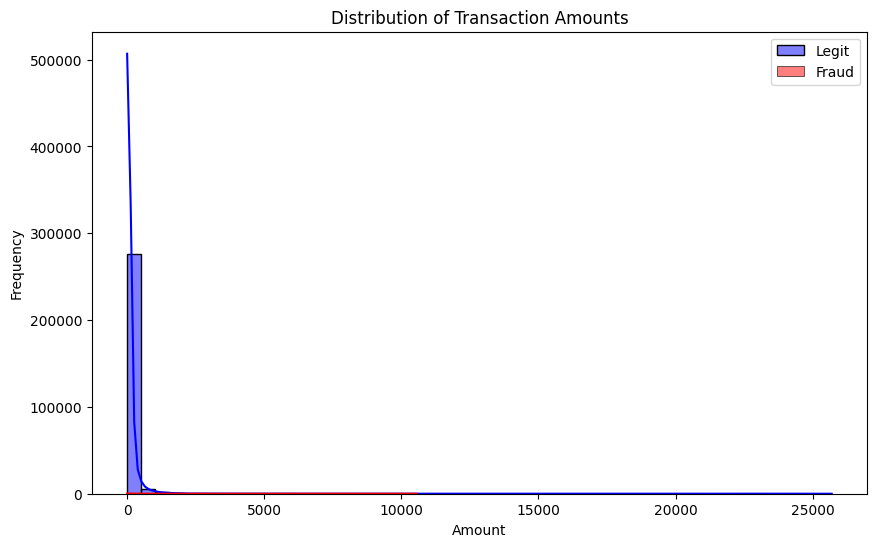

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of transaction amounts for both legitimate and fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(legit['Amount'], bins=50, label='Legit', color='blue', kde=True)
sns.histplot(fraud['Amount'], bins=50, label='Fraud', color='red', kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

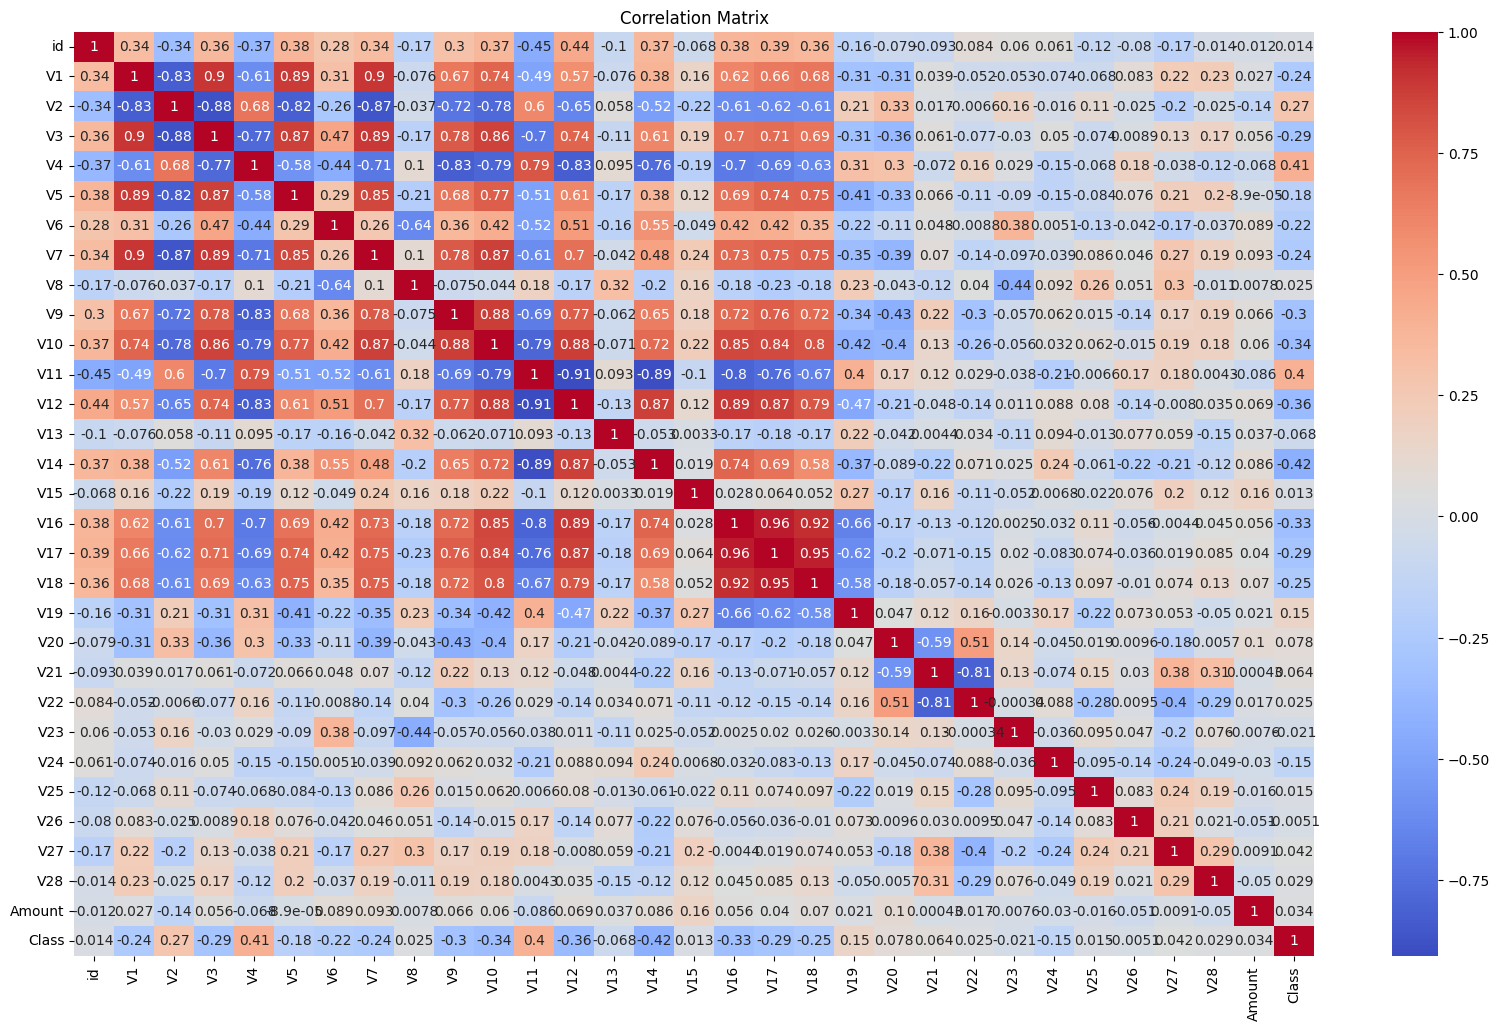

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = new_dataset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

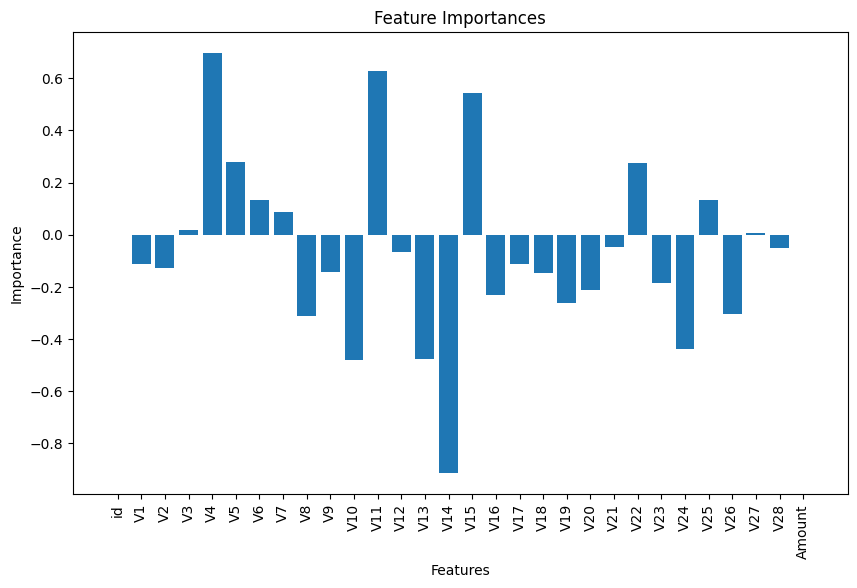

In [34]:
 import matplotlib.pyplot as plt

# Get feature importances from the Logistic Regression model
feature_importances = model.coef_[0]
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

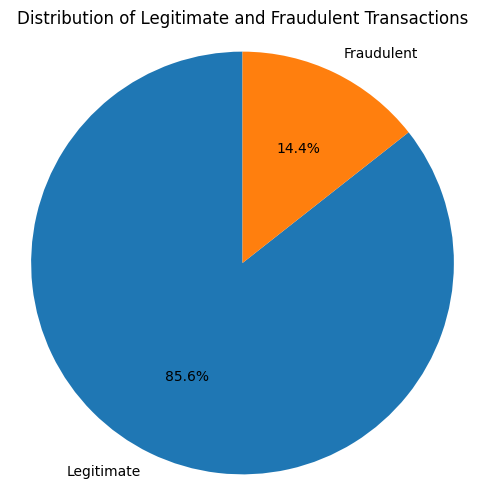

In [35]:
import matplotlib.pyplot as plt

# Assuming 'new_dataset' is your balanced dataset
class_counts = new_dataset['Class'].value_counts()
labels = ['Legitimate', 'Fraudulent']
sizes = class_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9190647482014388


In [42]:
import ipywidgets as widgets
from IPython.display import display, clear_output

sample_transactions = new_dataset.sample(n=20)


output = widgets.Output()

def on_transaction_select(change):
  with output:
    clear_output(wait=True)
    selected_index = change['new']
    selected_transaction = sample_transactions.iloc[selected_index]

    print(f"Transaction Details (Index: {selected_index}):")
    print(selected_transaction)

    features = selected_transaction.drop('Class')
    prediction = model.predict([features])


    print("\nPrediction:")
    if prediction[0] == 0:
        print("Legitimate Transaction")
    else:
        print("Fraudulent Transaction")

transaction_dropdown = widgets.Dropdown(
    options=list(range(len(sample_transactions))),
    description="Select Transaction:",
    value=0
)

transaction_dropdown.observe(on_transaction_select, names='value')

display(transaction_dropdown, output)

Dropdown(description='Select Transaction:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…

Output()